In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def H(i,j):
    H = 2*J*spins[i, j]*sum([spins[(i+1)%N,j],
                             spins[(i-1)%N,j],
                             spins[i,(j+1)%N],
                             spins[i,(j-1)%N]])
    return H

def montecarlo():
    for i in np.random.permutation([(x,y) for x in range(N) for y in range(N)]):
        if H(i[0],i[1])<=0:
            spins[i[0], i[1]] *= -1
        elif np.exp(-H(i[0],i[1])/t) > np.random.rand():
            spins[i[0], i[1]] *= -1
    return spins

N = 16             #  lenth of the ring
J =  1              #  coupling constant
T =  np.linspace(0.1,5,20)
versuche = 15

energie = np.zeros((len(T)))
heat = np.zeros((len(T)))
mag = np.zeros((len(T)))
mag_dump = np.zeros(versuche)
energie_dump = np.zeros(versuche)
for nt, t in enumerate(T):
    for v in range(versuche):
        spins = np.random.choice((-1,1),(N,N))
        for i in range(50):
            montecarlo()
        mag_dump[v] = abs(np.sum(spins))/N/N
        for i in [(x,y) for x in range(N) for y in range(N)]:
            energie_dump[v] += H(i[0], i[1])
    heat[nt] += abs(np.sum(spins))/N/N
    energie[nt] = np.median(energie_dump)/N/N
    mag[nt] = np.median(mag_dump)

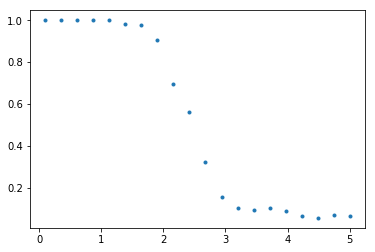

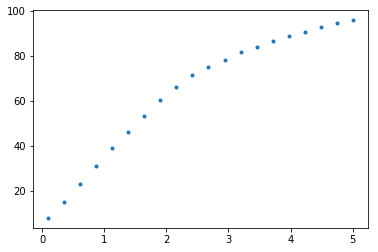

In [17]:
plt.plot(T,mag,".")
plt.show()
plt.plot(T,energie,".")
plt.show()